In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = scio.loadmat('./ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [29]:
X = data['X']
y = data['y']

In [4]:
print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


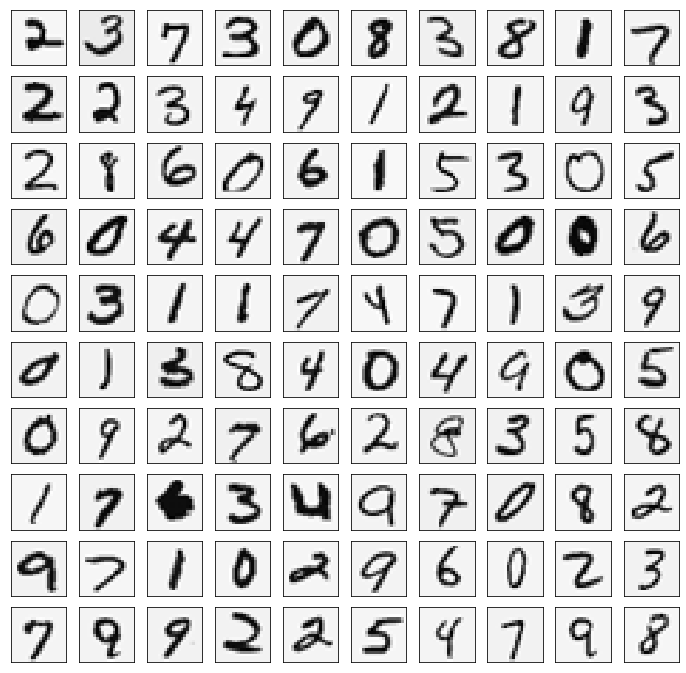

In [5]:

sample_idx = np.random.choice(np.arange(X.shape[0]), 100)
sample_images = data['X'][sample_idx, :]
fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(12,12))

for r in range(10):
    for c in range(10):
        ax_array[r, c].matshow(np.array(sample_images[10*r + c].reshape((20,20))).T, cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

## Vectorizing Logistic Regression

### 1.3.1 Vectorizing the cost function

In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [43]:
#先前传播函数
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    
    a1 = np.insert(X, 0, values=np.ones(m), axis=1)
    z2 = a1 * theta1.T
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1)
    z3 = a2 * theta2.T
    h = sigmoid(z3)
    
    return a1, z2, a2, z3, h

In [44]:
# cost function
def cost(theta1, theta2 , input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # compute the cost
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    return J

In [45]:
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)
y_onehot.shape

(5000, 10)

In [46]:
y[0], y_onehot[0,:] # y0是数字0

(array([10], dtype=uint8), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

In [47]:
import os
os.listdir('./')

['.ipynb_checkpoints',
 'displayData.m',
 'ex3.m',
 'ex3data1.mat',
 'ex3weights.mat',
 'ex3_nn.m',
 'fmincg.m',
 'lib',
 'lrCostFunction.m',
 'oneVsAll.m',
 'predict.m',
 'predictOneVsAll.m',
 'sigmoid.m',
 'submit.m',
 'Week4.ipynb']

In [48]:
input_size = 400
hidden_size = 25
num_labels = 10
learning_rate = 1


weight = loadmat("./ex3weights.mat")
theta1, theta2 = weight['Theta1'], weight['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [49]:
cost(theta1, theta2, input_size, hidden_size, num_labels, X, y_onehot, learning_rate)

0.2876291651613187

# One-vs-all Classication

In [50]:
def costReg(theta1, theta2, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)

    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # compute the cost
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    # add the cost regularization term
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))
    
    return J

In [51]:
costReg(theta1, theta2, input_size, hidden_size, num_labels, X, y_onehot, learning_rate)


0.3837698590909234

# Neural Network